<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/Practicing-with-python-/blob/main/Practicing_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow
import keras
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import subprocess
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "alessialeofolliero"
os.environ['KAGGLE_KEY'] = "4f468c4b65651a32ed5e320a2d8b06b3"
!kaggle datasets download -d toriqulstu/global-socio-economic-and-environmental-indicators

  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 83.1MB/s]


In [ ]:
#unzip
!unzip -q /content/global-socio-economic-and-environmental-indicators

In [ ]:
import csv

In [ ]:
df = pd.read_csv("co2_production.csv")
print(df.head())

  ISO3               Country    hdicode region  hdi_rank_2021  co2_prod_1990  \
0  AFG           Afghanistan        Low     SA          180.0       0.209727   
1  AGO                Angola     Medium    SSA          148.0       0.429586   
2  ALB               Albania       High    ECA           67.0       1.656902   
3  AND               Andorra  Very High    NaN           40.0       7.461153   
4  ARE  United Arab Emirates  Very High     AS           26.0      28.277672   

   co2_prod_1991  co2_prod_1992  co2_prod_1993  co2_prod_1994  ...  \
0       0.182525       0.095233       0.084285       0.075054  ...   
1       0.413433       0.408015       0.439647       0.286180  ...   
2       1.288961       0.768727       0.724712       0.607846  ...   
3       7.176510       6.906331       6.730577       6.488824  ...   
4      29.256027      28.134519      30.170919      31.644558  ...   

   co2_prod_2012  co2_prod_2013  co2_prod_2014  co2_prod_2015  co2_prod_2016  \
0       0.327922  

In [ ]:
print(df["Country"])
print(df["Country"].count())

0                          Afghanistan
1                               Angola
2                              Albania
3                              Andorra
4                 United Arab Emirates
                    ...               
201            Europe and Central Asia
202    Latin America and the Caribbean
203                         South Asia
204                 Sub-Saharan Africa
205                              World
Name: Country, Length: 206, dtype: object
206


Check if there are any missing values

In [ ]:
df.describe()

,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,co2_prod_1996,co2_prod_1997,co2_prod_1998,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
count,191.000000,198.000000,199.000000,202.000000,202.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,95.811518,4.569367,4.458777,4.457803,4.506336,4.445099,4.367130,4.424781,4.465631,4.397876,...,4.665355,4.562930,4.511419,4.451265,4.406362,4.451502,4.448896,4.474700,4.137836,4.137348
std,55.307333,5.890744,5.956083,6.368222,6.867169,6.869923,6.676659,6.667576,7.008381,6.419504,...,6.037280,5.675991,5.650989,5.546590,5.355878,5.417060,5.434894,5.617548,5.240365,5.240369
min,1.000000,0.038160,0.042797,0.038023,0.039180,0.024098,0.039779,0.039904,0.040697,0.036912,...,0.034139,0.026360,0.027907,0.036628,0.025563,0.030392,0.033065,0.030980,0.027660,0.027660
25%,48.500000,0.428147,0.436654,0.455272,0.440418,0.419337,0.434338,0.481691,0.494090,0.480207,...,0.652650,0.706292,0.694545,0.719652,0.743324,0.791250,0.779529,0.752446,0.721759,0.716751
50%,96.000000,2.104998,1.986245,1.875498,1.899897,1.793043,1.871042,1.831093,1.817226,2.026119,...,2.533112,2.568332,2.630255,2.588549,2.532990,2.577577,2.536822,2.614620,2.498537,2.498537
75%,143.500000,7.102710,6.786358,6.734483,6.421754,6.406048,6.546205,6.386689,6.328324,6.588312,...,6.368615,6.148596,5.878871,5.915500,5.924334,5.817693,5.781637,5.700688,5.241310,5.241310
max,191.000000,30.967990,35.663061,54.058479,61.188006,59.766962,60.957810,60.605782,68.723812,57.512483,...,42.031162,35.392331,36.767515,35.131562,33.494338,36.611801,38.439692,40.619378,37.019451,37.019451


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ISO3           195 non-null    object 
 1   Country        206 non-null    object 
 2   hdicode        191 non-null    object 
 3   region         151 non-null    object 
 4   hdi_rank_2021  191 non-null    float64
 5   co2_prod_1990  198 non-null    float64
 6   co2_prod_1991  199 non-null    float64
 7   co2_prod_1992  202 non-null    float64
 8   co2_prod_1993  202 non-null    float64
 9   co2_prod_1994  203 non-null    float64
 10  co2_prod_1995  203 non-null    float64
 11  co2_prod_1996  203 non-null    float64
 12  co2_prod_1997  203 non-null    float64
 13  co2_prod_1998  203 non-null    float64
 14  co2_prod_1999  203 non-null    float64
 15  co2_prod_2000  203 non-null    float64
 16  co2_prod_2001  203 non-null    float64
 17  co2_prod_2002  204 non-null    float64
 18  co2_prod_2

In [ ]:
df.shape

(206, 37)

In [ ]:
df.sort_values("co2_prod_2021",ascending=False)

,ISO3,Country,hdicode,region,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
146,QAT,Qatar,Very High,AS,42.0,23.959116,35.663061,54.058479,61.188006,59.766962,...,42.031162,35.392331,36.767515,35.131562,33.494338,36.611801,38.439692,40.619378,37.019451,37.019451
119,MNG,Mongolia,High,EAP,96.0,4.528088,5.465038,4.900345,4.092726,3.476068,...,12.401644,15.115184,10.062896,7.751733,8.286546,11.004224,14.994940,27.499754,26.978028,26.978028
176,TTO,Trinidad and Tobago,Very High,LAC,57.0,13.906296,13.805352,15.446804,14.000463,13.624592,...,33.875042,33.416414,34.018108,32.927664,29.074741,28.863076,29.122282,28.945722,25.373136,25.373136
25,BRN,Brunei Darussalam,Very High,EAP,51.0,23.919589,19.929755,19.022827,17.625257,16.202575,...,23.793889,18.862522,21.781784,16.761105,17.970700,22.503198,22.361835,22.982794,23.220543,23.220543
95,KWT,Kuwait,Very High,AS,50.0,18.043338,7.343292,15.502974,27.715901,33.282449,...,29.883067,23.169424,20.450530,23.816147,25.489483,23.457169,23.100820,22.973447,20.825107,20.825107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,CAF,Central African Republic,Low,SSA,188.0,0.065272,0.066191,0.065622,0.064954,0.066619,...,0.042947,0.026360,0.027907,0.039958,0.043604,0.047036,0.047112,0.044348,0.038907,0.038907
158,SOM,Somalia,NaN,AS,NaN,0.101161,0.097276,0.093311,0.087539,0.085373,...,0.047833,0.048241,0.046948,0.045677,0.044943,0.043700,0.042479,0.043075,0.035370,0.035370
35,COD,Congo (Democratic Republic of the),Low,SSA,179.0,0.122761,0.087239,0.075218,0.068588,0.042188,...,0.034139,0.049573,0.062777,0.036628,0.025563,0.030392,0.033065,0.030980,0.027660,0.027660
108,MCO,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df["Country"])

0                          Afghanistan
1                               Angola
2                              Albania
3                              Andorra
4                 United Arab Emirates
                    ...               
201            Europe and Central Asia
202    Latin America and the Caribbean
203                         South Asia
204                 Sub-Saharan Africa
205                              World
Name: Country, Length: 206, dtype: object


deleting region feature from the dataset

In [ ]:
del df['region']

In [ ]:
df.drop(["Monaco"])


KeyError: ignored

    ISO3                          Country    hdicode  hdi_rank_2021  \
0    AFG                      Afghanistan        Low          180.0   
1    AGO                           Angola     Medium          148.0   
2    ALB                          Albania       High           67.0   
3    AND                          Andorra  Very High           40.0   
4    ARE             United Arab Emirates  Very High           26.0   
..   ...                              ...        ...            ...   
201  NaN          Europe and Central Asia        NaN            NaN   
202  NaN  Latin America and the Caribbean        NaN            NaN   
203  NaN                       South Asia        NaN            NaN   
204  NaN               Sub-Saharan Africa        NaN            NaN   
205  NaN                            World        NaN            NaN   

     co2_prod_1990  co2_prod_1991  co2_prod_1992  co2_prod_1993  \
0         0.209727       0.182525       0.095233       0.084285   
1         0.4

In [ ]:
print(df[df["Country"]=="Italy"])

   ISO3 Country    hdicode  hdi_rank_2021  co2_prod_1990  co2_prod_1991  \
84  ITA   Italy  Very High           30.0        7.70488       7.691514   

    co2_prod_1992  co2_prod_1993  co2_prod_1994  co2_prod_1995  ...  \
84       7.687687       7.545852       7.442236       7.867611  ...   

    co2_prod_2012  co2_prod_2013  co2_prod_2014  co2_prod_2015  co2_prod_2016  \
84       6.737655       6.146814       5.786856       5.964204        5.90245   

    co2_prod_2017  co2_prod_2018  co2_prod_2019  co2_prod_2020  co2_prod_2021  
84       5.815533        5.75682       5.611425       5.024911       5.024911  

[1 rows x 36 columns]


Function for percentile

In [ ]:
def perc_10(column):
  return column.quantile(0.1)

In [ ]:
df["co2_prod_1997"].agg(perc_10)

0.1585908994

In [ ]:
def perc_80(column):
  return column.quantile(0.8)

In [ ]:
df["co2_prod_1997"].agg(perc_80)

7.172550559600003

Italy in 1997 is above the 80th percentile

Let's see which country has the maximum value in that year

In [ ]:
print(df["co2_prod_1997"].max())
val_max=df["co2_prod_1997"].max()
print(df[df["co2_prod_1997"]==val_max])

68.72381244
    ISO3 Country    hdicode  hdi_rank_2021  co2_prod_1990  co2_prod_1991  \
146  QAT   Qatar  Very High           42.0      23.959116      35.663061   

     co2_prod_1992  co2_prod_1993  co2_prod_1994  co2_prod_1995  ...  \
146      54.058479      61.188006      59.766962       60.95781  ...   

     co2_prod_2012  co2_prod_2013  co2_prod_2014  co2_prod_2015  \
146      42.031162      35.392331      36.767515      35.131562   

     co2_prod_2016  co2_prod_2017  co2_prod_2018  co2_prod_2019  \
146      33.494338      36.611801      38.439692      40.619378   

     co2_prod_2020  co2_prod_2021  
146      37.019451      37.019451  

[1 rows x 36 columns]


And what about the minimum value?

In [ ]:
print(df["co2_prod_1997"].min())
val_min=df["co2_prod_1997"].min()
print(df[df["co2_prod_1997"]==val_min])

0.04069662
   ISO3  Country hdicode  hdi_rank_2021  co2_prod_1990  co2_prod_1991  \
11  BDI  Burundi     Low          187.0       0.038399       0.042797   

    co2_prod_1992  co2_prod_1993  co2_prod_1994  co2_prod_1995  ...  \
11       0.038023        0.03918       0.039753       0.039779  ...   

    co2_prod_2012  co2_prod_2013  co2_prod_2014  co2_prod_2015  co2_prod_2016  \
11       0.041009       0.041718       0.038085       0.038471       0.044569   

    co2_prod_2017  co2_prod_2018  co2_prod_2019  co2_prod_2020  co2_prod_2021  
11       0.048989       0.060787       0.061058       0.050643       0.050643  

[1 rows x 36 columns]


Indexing Country


In [ ]:
df_new=df.set_index("Country")
print(df_new.head())

                     ISO3    hdicode  hdi_rank_2021  co2_prod_1990  \
Country                                                              
Afghanistan           AFG        Low          180.0       0.209727   
Angola                AGO     Medium          148.0       0.429586   
Albania               ALB       High           67.0       1.656902   
Andorra               AND  Very High           40.0       7.461153   
United Arab Emirates  ARE  Very High           26.0      28.277672   

                      co2_prod_1991  co2_prod_1992  co2_prod_1993  \
Country                                                             
Afghanistan                0.182525       0.095233       0.084285   
Angola                     0.413433       0.408015       0.439647   
Albania                    1.288961       0.768727       0.724712   
Andorra                    7.176510       6.906331       6.730577   
United Arab Emirates      29.256027      28.134519      30.170919   

                      co2

Drop Monaco and San Marino

In [ ]:
df_new.drop(["Monaco"])


,ISO3,hdicode,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,co2_prod_1996,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Low,180.0,0.209727,0.182525,0.095233,0.084285,0.075054,0.067943,0.061787,...,0.327922,0.261571,0.232967,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376
Angola,AGO,Medium,148.0,0.429586,0.413433,0.408015,0.439647,0.286180,0.785137,0.723853,...,1.346212,1.277248,1.235861,1.205736,1.088803,0.953168,0.791171,0.737992,0.675410,0.675410
Albania,ALB,High,67.0,1.656902,1.288961,0.768727,0.724712,0.607846,0.663843,0.643237,...,1.601835,1.697127,1.940611,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754
Andorra,AND,Very High,40.0,7.461153,7.176510,6.906331,6.730577,6.488824,6.656539,7.059354,...,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945
United Arab Emirates,ARE,Very High,26.0,28.277672,29.256027,28.134519,30.170919,31.644558,28.989520,28.661398,...,22.047365,22.330116,21.914832,23.381781,22.932086,17.795688,16.011240,15.780701,15.193336,15.193336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Europe and Central Asia,NaN,NaN,NaN,7.881364,7.214329,6.832903,6.100367,5.237056,4.990107,4.838831,...,5.586801,5.485903,5.411763,5.335794,5.465763,5.560856,5.608151,5.414787,5.231702,5.233625
Latin America and the Caribbean,NaN,NaN,NaN,2.269181,2.273636,2.264498,2.311172,2.348712,2.350795,2.410691,...,3.034836,3.091743,3.067060,3.006004,2.907513,2.825852,2.691328,2.607044,2.326692,2.324879
South Asia,NaN,NaN,NaN,0.734192,0.765133,0.787019,0.797607,0.838114,0.864041,0.904559,...,1.598469,1.621208,1.710420,1.742220,1.814518,1.879986,1.946198,1.959379,1.845635,1.843217


In [ ]:
df_new.drop(["San Marino"])
df_new.drop(["World"])

,ISO3,hdicode,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,co2_prod_1996,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Low,180.0,0.209727,0.182525,0.095233,0.084285,0.075054,0.067943,0.061787,...,0.327922,0.261571,0.232967,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376
Angola,AGO,Medium,148.0,0.429586,0.413433,0.408015,0.439647,0.286180,0.785137,0.723853,...,1.346212,1.277248,1.235861,1.205736,1.088803,0.953168,0.791171,0.737992,0.675410,0.675410
Albania,ALB,High,67.0,1.656902,1.288961,0.768727,0.724712,0.607846,0.663843,0.643237,...,1.601835,1.697127,1.940611,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754
Andorra,AND,Very High,40.0,7.461153,7.176510,6.906331,6.730577,6.488824,6.656539,7.059354,...,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945
United Arab Emirates,ARE,Very High,26.0,28.277672,29.256027,28.134519,30.170919,31.644558,28.989520,28.661398,...,22.047365,22.330116,21.914832,23.381781,22.932086,17.795688,16.011240,15.780701,15.193336,15.193336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
East Asia and the Pacific,NaN,NaN,NaN,1.838168,1.912917,1.979745,2.089213,2.184505,2.325181,2.410524,...,5.477298,5.542558,5.529828,5.465488,5.382540,5.460194,5.650539,5.784744,5.781421,5.772866
Europe and Central Asia,NaN,NaN,NaN,7.881364,7.214329,6.832903,6.100367,5.237056,4.990107,4.838831,...,5.586801,5.485903,5.411763,5.335794,5.465763,5.560856,5.608151,5.414787,5.231702,5.233625
Latin America and the Caribbean,NaN,NaN,NaN,2.269181,2.273636,2.264498,2.311172,2.348712,2.350795,2.410691,...,3.034836,3.091743,3.067060,3.006004,2.907513,2.825852,2.691328,2.607044,2.326692,2.324879


In [ ]:
print(df["co2_prod_1997"].mean())
val_mean_1997=df["co2_prod_1997"].mean()

4.465631138182266


Subsetting

In [ ]:
df[df["co2_prod_1997"]>val_mean_1997]

,ISO3,Country,hdicode,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
3,AND,Andorra,Very High,40.0,7.461153,7.176510,6.906331,6.730577,6.488824,6.656539,...,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945
4,ARE,United Arab Emirates,Very High,26.0,28.277672,29.256027,28.134519,30.170919,31.644558,28.989520,...,22.047365,22.330116,21.914832,23.381781,22.932086,17.795688,16.011240,15.780701,15.193336,15.193336
8,AUS,Australia,Very High,5.0,16.471401,16.398136,16.453819,16.549526,16.860062,17.118954,...,17.580628,16.906991,16.920093,16.850700,17.143393,16.870352,16.708116,16.446992,15.368380,15.368380
9,AUT,Austria,Very High,25.0,8.045120,8.457575,7.692123,7.686282,7.679979,8.011293,...,7.911257,7.919250,7.447395,7.645374,7.684142,7.891120,7.486503,7.589238,6.732425,6.732425
12,BEL,Belgium,Very High,13.0,12.022922,12.289365,12.155554,12.001454,12.289169,12.363826,...,9.236138,9.203193,8.632538,8.952519,8.795879,8.708432,8.728936,8.643987,7.226206,7.226206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,UZB,Uzbekistan,High,101.0,5.074715,4.928003,5.192219,5.288507,4.834304,4.504567,...,3.901304,3.657320,3.449407,3.278809,3.440289,3.352751,3.532804,3.462494,3.369793,3.369793
187,VEN,Venezuela (Bolivarian Republic of),Medium,120.0,6.205118,5.725039,5.135637,5.898410,6.031847,6.058807,...,6.206376,6.964999,6.214706,5.987807,5.677379,5.493941,4.160218,3.477903,2.975442,2.975442
192,ZAF,South Africa,High,109.0,8.504575,8.644702,7.792787,8.083800,8.347905,8.727727,...,8.728295,8.491159,8.811716,8.135061,8.268788,8.142443,8.032054,8.127334,7.620420,7.620420
195,NaN,Very high human development,NaN,NaN,11.517141,11.352864,11.025207,10.952298,10.840827,10.850163,...,10.561869,10.499338,10.383958,10.316239,10.149167,10.109423,10.131831,9.858904,9.017568,9.017078


In [ ]:
df["hdicode"].value_counts()

Very High    66
High         49
Medium       44
Low          32
Name: hdicode, dtype: int64

In [ ]:
df["hdicode"].isna().sum()

15

In [ ]:
df.groupby(["hdicode"])["co2_prod_2019"].mean()

hdicode
High         4.245890
Low          0.294677
Medium       1.458508
Very High    8.946903
Name: co2_prod_2019, dtype: float64

In [ ]:
print(df_new.head())

                     ISO3    hdicode  hdi_rank_2021  co2_prod_1990  \
Country                                                              
Afghanistan           AFG        Low          180.0       0.209727   
Angola                AGO     Medium          148.0       0.429586   
Albania               ALB       High           67.0       1.656902   
Andorra               AND  Very High           40.0       7.461153   
United Arab Emirates  ARE  Very High           26.0      28.277672   

                      co2_prod_1991  co2_prod_1992  co2_prod_1993  \
Country                                                             
Afghanistan                0.182525       0.095233       0.084285   
Angola                     0.413433       0.408015       0.439647   
Albania                    1.288961       0.768727       0.724712   
Andorra                    7.176510       6.906331       6.730577   
United Arab Emirates      29.256027      28.134519      30.170919   

                      co2

In [ ]:
df_new.loc[["Italy","Albania"]]

,ISO3,hdicode,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,co2_prod_1996,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
Country,,,,,,,,,,,,,,,,,,,,,
Italy,ITA,Very High,30.0,7.704880,7.691514,7.687687,7.545852,7.442236,7.867611,7.781084,...,6.737655,6.146814,5.786856,5.964204,5.902450,5.815533,5.756820,5.611425,5.024911,5.024911
Albania,ALB,High,67.0,1.656902,1.288961,0.768727,0.724712,0.607846,0.663843,0.643237,...,1.601835,1.697127,1.940611,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754


In [ ]:
df_new_i=df_new.set_index("ISO3")

In [ ]:
print(df_new_i.head())

        hdicode  hdi_rank_2021  co2_prod_1990  co2_prod_1991  co2_prod_1992  \
ISO3                                                                          
AFG         Low          180.0       0.209727       0.182525       0.095233   
AGO      Medium          148.0       0.429586       0.413433       0.408015   
ALB        High           67.0       1.656902       1.288961       0.768727   
AND   Very High           40.0       7.461153       7.176510       6.906331   
ARE   Very High           26.0      28.277672      29.256027      28.134519   

      co2_prod_1993  co2_prod_1994  co2_prod_1995  co2_prod_1996  \
ISO3                                                               
AFG        0.084285       0.075054       0.067943       0.061787   
AGO        0.439647       0.286180       0.785137       0.723853   
ALB        0.724712       0.607846       0.663843       0.643237   
AND        6.730577       6.488824       6.656539       7.059354   
ARE       30.170919      31.644558    

In [ ]:
df_new_i.reset_index()

,ISO3,hdicode,hdi_rank_2021,co2_prod_1990,co2_prod_1991,co2_prod_1992,co2_prod_1993,co2_prod_1994,co2_prod_1995,co2_prod_1996,...,co2_prod_2012,co2_prod_2013,co2_prod_2014,co2_prod_2015,co2_prod_2016,co2_prod_2017,co2_prod_2018,co2_prod_2019,co2_prod_2020,co2_prod_2021
0,AFG,Low,180.0,0.209727,0.182525,0.095233,0.084285,0.075054,0.067943,0.061787,...,0.327922,0.261571,0.232967,0.229680,0.190617,0.188995,0.224492,0.319299,0.312376,0.312376
1,AGO,Medium,148.0,0.429586,0.413433,0.408015,0.439647,0.286180,0.785137,0.723853,...,1.346212,1.277248,1.235861,1.205736,1.088803,0.953168,0.791171,0.737992,0.675410,0.675410
2,ALB,High,67.0,1.656902,1.288961,0.768727,0.724712,0.607846,0.663843,0.643237,...,1.601835,1.697127,1.940611,1.555329,1.556278,1.838242,1.642153,1.688178,1.575754,1.575754
3,AND,Very High,40.0,7.461153,7.176510,6.906331,6.730577,6.488824,6.656539,7.059354,...,5.912019,5.896947,5.828084,5.964928,6.067376,6.043168,6.423396,6.505535,6.034945,6.034945
4,ARE,Very High,26.0,28.277672,29.256027,28.134519,30.170919,31.644558,28.989520,28.661398,...,22.047365,22.330116,21.914832,23.381781,22.932086,17.795688,16.011240,15.780701,15.193336,15.193336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,NaN,NaN,7.881364,7.214329,6.832903,6.100367,5.237056,4.990107,4.838831,...,5.586801,5.485903,5.411763,5.335794,5.465763,5.560856,5.608151,5.414787,5.231702,5.233625
202,NaN,NaN,NaN,2.269181,2.273636,2.264498,2.311172,2.348712,2.350795,2.410691,...,3.034836,3.091743,3.067060,3.006004,2.907513,2.825852,2.691328,2.607044,2.326692,2.324879
203,NaN,NaN,NaN,0.734192,0.765133,0.787019,0.797607,0.838114,0.864041,0.904559,...,1.598469,1.621208,1.710420,1.742220,1.814518,1.879986,1.946198,1.959379,1.845635,1.843217
204,NaN,NaN,NaN,0.937493,0.942848,0.873639,0.890826,0.876438,0.908111,0.899234,...,0.872779,0.862625,0.890260,0.828164,0.830583,0.803148,0.799792,0.788715,0.726158,0.719480


In [ ]:
print(df_new)

        hdicode  hdi_rank_2021  co2_prod_1990  co2_prod_1991  co2_prod_1992  \
ISO3                                                                          
AFG         Low          180.0       0.209727       0.182525       0.095233   
AGO      Medium          148.0       0.429586       0.413433       0.408015   
ALB        High           67.0       1.656902       1.288961       0.768727   
AND   Very High           40.0       7.461153       7.176510       6.906331   
ARE   Very High           26.0      28.277672      29.256027      28.134519   
...         ...            ...            ...            ...            ...   
NaN         NaN            NaN       7.881364       7.214329       6.832903   
NaN         NaN            NaN       2.269181       2.273636       2.264498   
NaN         NaN            NaN       0.734192       0.765133       0.787019   
NaN         NaN            NaN       0.937493       0.942848       0.873639   
NaN         NaN            NaN       4.156845       

In [ ]:
print(df_new.head())

        hdicode  hdi_rank_2021  co2_prod_1990  co2_prod_1991  co2_prod_1992  \
ISO3                                                                          
AFG         Low          180.0       0.209727       0.182525       0.095233   
AGO      Medium          148.0       0.429586       0.413433       0.408015   
ALB        High           67.0       1.656902       1.288961       0.768727   
AND   Very High           40.0       7.461153       7.176510       6.906331   
ARE   Very High           26.0      28.277672      29.256027      28.134519   

      co2_prod_1993  co2_prod_1994  co2_prod_1995  co2_prod_1996  \
ISO3                                                               
AFG        0.084285       0.075054       0.067943       0.061787   
AGO        0.439647       0.286180       0.785137       0.723853   
ALB        0.724712       0.607846       0.663843       0.643237   
AND        6.730577       6.488824       6.656539       7.059354   
ARE       30.170919      31.644558    

In [ ]:
Ita=df_new.loc["Italy"]

In [ ]:
Ita

ISO3                   ITA
hdicode          Very High
hdi_rank_2021         30.0
co2_prod_1990      7.70488
co2_prod_1991     7.691514
co2_prod_1992     7.687687
co2_prod_1993     7.545852
co2_prod_1994     7.442236
co2_prod_1995     7.867611
co2_prod_1996     7.781084
co2_prod_1997     7.903784
co2_prod_1998     8.141054
co2_prod_1999     8.232629
co2_prod_2000     8.299085
co2_prod_2001     8.273841
co2_prod_2002     8.359287
co2_prod_2003     8.615797
co2_prod_2004     8.655417
co2_prod_2005     8.617863
co2_prod_2006     8.487695
co2_prod_2007     8.350987
co2_prod_2008     8.127727
co2_prod_2009     7.186099
co2_prod_2010     7.351909
co2_prod_2011     7.120055
co2_prod_2012     6.737655
co2_prod_2013     6.146814
co2_prod_2014     5.786856
co2_prod_2015     5.964204
co2_prod_2016      5.90245
co2_prod_2017     5.815533
co2_prod_2018      5.75682
co2_prod_2019     5.611425
co2_prod_2020     5.024911
co2_prod_2021     5.024911
Name: Italy, dtype: object

In [ ]:
Ita=Ita.drop(["hdicode","hdi_rank_2021"])

KeyError: ignored

Data visualization

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
Ita=pd.DataFrame(Ita)

In [ ]:
Ita=Ita.drop("ISO3")

In [ ]:
print(Ita)

                  Italy
co2_prod_1990   7.70488
co2_prod_1991  7.691514
co2_prod_1992  7.687687
co2_prod_1993  7.545852
co2_prod_1994  7.442236
co2_prod_1995  7.867611
co2_prod_1996  7.781084
co2_prod_1997  7.903784
co2_prod_1998  8.141054
co2_prod_1999  8.232629
co2_prod_2000  8.299085
co2_prod_2001  8.273841
co2_prod_2002  8.359287
co2_prod_2003  8.615797
co2_prod_2004  8.655417
co2_prod_2005  8.617863
co2_prod_2006  8.487695
co2_prod_2007  8.350987
co2_prod_2008  8.127727
co2_prod_2009  7.186099
co2_prod_2010  7.351909
co2_prod_2011  7.120055
co2_prod_2012  6.737655
co2_prod_2013  6.146814
co2_prod_2014  5.786856
co2_prod_2015  5.964204
co2_prod_2016   5.90245
co2_prod_2017  5.815533
co2_prod_2018   5.75682
co2_prod_2019  5.611425
co2_prod_2020  5.024911
co2_prod_2021  5.024911


In [ ]:
print(Ita["Italy"])

co2_prod_1990     7.70488
co2_prod_1991    7.691514
co2_prod_1992    7.687687
co2_prod_1993    7.545852
co2_prod_1994    7.442236
co2_prod_1995    7.867611
co2_prod_1996    7.781084
co2_prod_1997    7.903784
co2_prod_1998    8.141054
co2_prod_1999    8.232629
co2_prod_2000    8.299085
co2_prod_2001    8.273841
co2_prod_2002    8.359287
co2_prod_2003    8.615797
co2_prod_2004    8.655417
co2_prod_2005    8.617863
co2_prod_2006    8.487695
co2_prod_2007    8.350987
co2_prod_2008    8.127727
co2_prod_2009    7.186099
co2_prod_2010    7.351909
co2_prod_2011    7.120055
co2_prod_2012    6.737655
co2_prod_2013    6.146814
co2_prod_2014    5.786856
co2_prod_2015    5.964204
co2_prod_2016     5.90245
co2_prod_2017    5.815533
co2_prod_2018     5.75682
co2_prod_2019    5.611425
co2_prod_2020    5.024911
co2_prod_2021    5.024911
Name: Italy, dtype: object


In [ ]:
# Data for Italy
data = {
    "Year": [
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
        2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021
    ],
    "CO2 Production (MtCO2)": [
        7.70488, 7.691514, 7.687687, 7.545852, 7.442236, 7.867611,
        7.781084, 7.903784, 8.141054, 8.232629, 8.299085, 8.273841,
        8.359287, 8.615797, 8.655417, 8.617863, 8.487695, 8.350987,
        8.127727, 7.186099, 7.351909, 7.120055, 6.737655, 6.146814,
        5.786856, 5.964204, 5.90245, 5.815533, 5.75682, 5.611425,
        5.024911, 5.024911
    ]
}

In [ ]:
italy_pd=pd.DataFrame(data)

<Axes: xlabel='Year'>

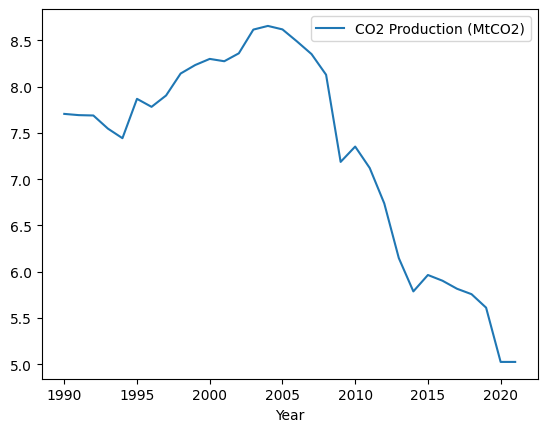

In [ ]:
italy_pd.plot(x="Year",y="CO2 Production (MtCO2)", kind="line")

In [ ]:
df_new.isna().sum()

ISO3             11
hdicode          15
hdi_rank_2021    15
co2_prod_1990     8
co2_prod_1991     7
co2_prod_1992     4
co2_prod_1993     4
co2_prod_1994     3
co2_prod_1995     3
co2_prod_1996     3
co2_prod_1997     3
co2_prod_1998     3
co2_prod_1999     3
co2_prod_2000     3
co2_prod_2001     3
co2_prod_2002     2
co2_prod_2003     2
co2_prod_2004     2
co2_prod_2005     2
co2_prod_2006     2
co2_prod_2007     2
co2_prod_2008     2
co2_prod_2009     2
co2_prod_2010     2
co2_prod_2011     2
co2_prod_2012     2
co2_prod_2013     2
co2_prod_2014     2
co2_prod_2015     2
co2_prod_2016     2
co2_prod_2017     2
co2_prod_2018     2
co2_prod_2019     2
co2_prod_2020     2
co2_prod_2021     2
dtype: int64

<Axes: >

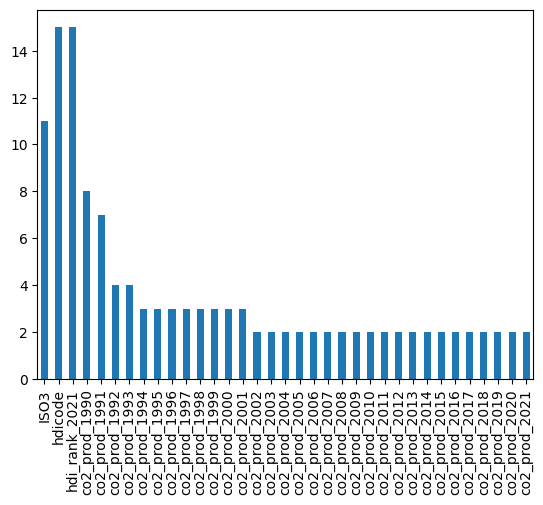

In [ ]:
df_new.isna().sum().plot(kind="bar")